In [1]:
import modules.dataProcessor as dp

period_data, countrydata, athletedata, matchdata = dp.processData('/Users/seonghyunyoon/Developer/PAPERS/example_data/mens_epee_olympics.csv')

In [2]:
period_data

{1984: [(2808, 'Olivier Lenglet', 'Greger Forslöw'),
  (2809, 'Angelo Mazzoni', 'Zhao Zhizhong'),
  (2810, 'Zhao Zhizhong', 'Saúl Mendoza'),
  (2811, 'Jerri Bergström', 'Yun Nam-Jin'),
  (2812, 'Daniel Giger', 'Yun Nam-Jin'),
  (2813, 'Yun Nam-Jin', 'Martin Brill'),
  (2814, 'Daniel Perreault', 'Stéphane Ganeff'),
  (2815, 'Sergio Lucchetti', 'Thierry Soumagne'),
  (2816, 'Mohamed Ahmed Abu Ali', 'Lee Tai-Chung'),
  (2817, 'Stefano Bellone', 'Hannes Lembacher'),
  (2818, 'David Cocker', 'Sandro Cuomo'),
  (2819, 'Stefano Bellone', 'Khaled Soliman'),
  (2820, 'Stefano Bellone', 'José Rafael Magallanes'),
  (2821, 'Daniel Giger', 'Jerri Bergström'),
  (2822, 'Daniel Giger', 'Kim Seong-Mun'),
  (2823, 'Jerri Bergström', 'Kim Seong-Mun'),
  (2824, 'Olivier Lenglet', 'Sergio Lucchetti'),
  (2825, 'Angelo Mazzoni', 'Steven Paul'),
  (2826, 'Volker Fischer', 'Cui Yining'),
  (2827, 'Robert Marx', 'Cui Yining'),
  (2828, 'Abdel Monem Salem', 'Zhao Zhizhong'),
  (2829, 'John Llewellyn', 'Elmar 

In [2]:
matchdata

{(0, 'Aage Leidersdorff', 'Eduardo Prieto Souza'): (3.0, 3.0),
 (1, 'Bernard Schmetz', 'André Poplimont'): (3.0, 3.0),
 (2, 'Raúl Saucedo', 'George Calnan'): (3.0, 3.0),
 (3, 'George Calnan', 'Pat Farrell'): (3.0, 3.0),
 (4, 'Giancarlo Cornaggia-Medici', 'Stig Lindström'): (3.0, 3.0),
 (5, 'Saverio Ragno', 'Raúl Saucedo'): (3.0, 3.0),
 (6, 'Doris de Jong', 'Tibor Benkő'): (3.0, 3.0),
 (7, 'George Calnan', 'Paul de Graffenried'): (3.0, 3.0),
 (8, 'Giancarlo Cornaggia-Medici', 'Carlo Agostoni'): (3.0, 3.0),
 (9, 'Giancarlo Cornaggia-Medici', 'Raúl Saucedo'): (3.0, 3.0),
 (10, 'Saverio Ragno', 'Xavier De Beukelaer'): (3.0, 2.0),
 (11, 'Saverio Ragno', 'Sven Thofelt'): (3.0, 2.0),
 (12, 'Saverio Ragno', 'Doris de Jong'): (3.0, 2.0),
 (13, 'Saverio Ragno', 'Bertram Markus'): (3.0, 2.0),
 (14, 'Géo Buchard', 'Sven Thofelt'): (3.0, 2.0),
 (15, 'Géo Buchard', 'Aage Leidersdorff'): (3.0, 2.0),
 (16, 'Xavier De Beukelaer', 'Géo Buchard'): (3.0, 2.0),
 (17, 'Xavier De Beukelaer', 'Eduardo Prieto 

In [ ]:

# update process 
# for loop 
# if declared and in year, we Glicko modify it
# every time we initialize if not declared previously 
# we update it given the observations 


def updateObservation(period, athletedata, ): 
    for name in athletedata: 
        if period in athletedata[name].keys(): 
            matches = athletedata[name][period]
    
def updateNonObservation(period): 
    

In [ ]:
for name in athletedata: 
    if year in athletedata[name].keys(): 
        athletedata[name][year]

In [72]:
dict = {'a':3}

def updateDF(dict): 
    dict['b'] = 6

updateDF(dict)
dict

{'a': 3, 'b': 6}

In [9]:
import emcee
import numpy as np
from scipy.stats import gamma

# Mock constants and data
CONST_1 = 1.0
CONST_2 = 2.0
observations_I1 = np.random.rand(10)  # Mock observations for I_(i,1)
observations_I2 = np.random.rand(10)  # Mock observations for I_(i,2)

# Prior distributions (gamma)
alpha_f1, loc_f1, scale_f1 = 2, 0, 0.5  # Parameters for f1
alpha_g1, loc_g1, scale_g1 = 3, 0, 0.5  # Parameters for g1


def log_prior(theta):
    f2, g2 = theta
    log_prior_f2 = gamma.logpdf(f2, alpha_f1, loc_f1, scale_f1)
    log_prior_g2 = gamma.logpdf(g2, alpha_g1, loc_g1, scale_g1)
    return log_prior_f2 + log_prior_g2


def log_likelihood(theta):
    f2, g2 = theta
    # Here, you'll compute the likelihood of observations based on your model. 
    # This is a placeholder and will need to be defined further.
    likelihood_I1 = observations_I1 - (CONST_1 * (f2 > g2) + CONST_2)
    likelihood_I2 = observations_I2 - (CONST_1 * (g2 > f2) + CONST_2)
    
    # Assuming Gaussian noise for simplicity
    s2 = 0.5  # Variance, just for this example
    return -0.5 * (np.sum((likelihood_I1)**2) + np.sum((likelihood_I2)**2)) / s2


def log_posterior(theta):
    lp = log_prior(theta)
    if not np.isfinite(lp):
        return -np.inf
    return lp + log_likelihood(theta)


# MCMC Sampling
ndim, nwalkers = 2, 100
start = np.array([1.0, 1.0])
pos = start + 1e-4 * np.random.randn(nwalkers, ndim)

sampler = emcee.EnsembleSampler(nwalkers, ndim, log_posterior)
sampler.run_mcmc(pos, 1000, progress=True)
print(sampler)

100%|██████████| 1000/1000 [00:05<00:00, 166.97it/s]

In [6]:
athletedata

{'Robert Felisiak': {1992: [(3622, 'Krisztián Kulcsár', 'Robert Felisiak'),
   (3625, 'Robert Felisiak', "Michael O'Brien"),
   (3671, 'Robert Felisiak', 'Manuel Pereira'),
   (3672, 'Robert Felisiak', 'José Bandeira'),
   (3720, 'Robert Felisiak', 'José Marcelo Álvarez'),
   (3759, 'Robert Felisiak', 'Robert Marx'),
   (3813, 'Robert Felisiak', 'Jean-Michel Henry'),
   (3848, 'Angelo Mazzoni', 'Robert Felisiak'),
   (3853, 'Robert Felisiak', 'Danek Nowosielski'),
   (3867, 'Pavel Kolobkov', 'Robert Felisiak'),
   (7738, 'Robert Felisiak', 'Krisztián Kulcsár'),
   (7741, "Michael O'Brien", 'Robert Felisiak'),
   (7787, 'Manuel Pereira', 'Robert Felisiak'),
   (7788, 'José Bandeira', 'Robert Felisiak'),
   (7836, 'José Marcelo Álvarez', 'Robert Felisiak'),
   (7875, 'Robert Marx', 'Robert Felisiak'),
   (7929, 'Jean-Michel Henry', 'Robert Felisiak'),
   (7964, 'Robert Felisiak', 'Angelo Mazzoni'),
   (7969, 'Danek Nowosielski', 'Robert Felisiak'),
   (7983, 'Robert Felisiak', 'Pavel Kol

In [ ]:



# finding the goat: we get multiple observations from each pdf --> put them into the final pdf 

# log_likelihood(params, I_values, constant) -> liklihood function, prior, posterior
# log_prior(params) -> Gamma distribution
# log_probability -> 


# analysis table of pd over time 
# analysis table of the overall rankings
# --name: pds of athletes over time 
# -g: we also get the glicko modified ones too. 

In [47]:
f = {'a':{'a':[1]}}
def fun(d): 
    d['a']['a'] = [3]
    
fun(f)
f

{'a': {'a': [3]}}

In [80]:
import numpy as np
from scipy.stats import gamma
import matplotlib.pyplot as plt

DEFAULT_PARAMS = (2., 2.)

def initializeParams(curr_matches, params, curr_names, curr_period, prev_period): 
    if prev_period is None: 
        params[curr_period] = {name: DEFAULT_PARAMS for name in curr_names}
    else: 
        for name in curr_names: 
            if name not in params[prev_period].keys(): 
                params[curr_period][name] = (2., 2.)
            else: 
                params[curr_period][name] = params[prev_period][name]
    
def probGreaterThan(params1, params2): 
    a1, b1 = params1
    a2, b2 = params2
    samples1 = gamma.rvs(a1, scale = 1 / b1, size = 10000)
    samples2 = gamma.rvs(a2, scale = 1 / b2, size = 10000)
    return (samples1 > samples2).mean()
        
def getW(score1, score2): 
    if score1 == score2: 
        return 0.5
    return score1 > score2

def performanceIndicator(score1, score2, params1, params2): 
    W = getW(score1, score2)
    P = probGreaterThan(params1, params2)
    R = score1 / (score1 + score2)
    pi1 = W * P + R
    pi2 = (1 - W) * (1 - P) + (1 - R)
    return (pi1, pi2)
    
def performanceIndicatorDict(curr_matches, match_data, prev_params, curr_names): 
    pi_dict = {name: [] for name in curr_names}
    for match in curr_matches: 
        _, name1, name2 = match
        score1, score2 = match_data[match]
        params1 = prev_params[name1]
        params2 = prev_params[name2]
        
        if name1 not in prev_params.keys(): 
            params1 = DEFAULT_PARAMS
        if name2 not in prev_params.keys(): 
            params2 = DEFAULT_PARAMS
        pi1, pi2 = performanceIndicator(score1, score2, params1, params2)
        
        pi_dict[name1].append(pi1)
        pi_dict[name2].append(pi2)
    return pi_dict

def getAllNames(curr_matches): 
    return set(match[1] for match in curr_matches) | set(match[2] for match in curr_matches)

def updateGammaPrior(pi_dict, params, curr_period, name): 
    pi_list = pi_dict[name]
    n = len(pi_list)
    a, b = params[curr_period][name]
    a_n = a + n
    b_n = b + sum(pi_list)
    params[curr_period][name] = (a_n, b_n)
    
def updateObservations(curr_matches, match_data, params, curr_names, curr_period, prev_period): 
    initializeParams(curr_matches, params, curr_names, curr_period, prev_period)
    if prev_period == None: 
        pi_dict = performanceIndicatorDict(curr_matches, match_data, params[curr_period], curr_names)
    else: 
        pi_dict = performanceIndicatorDict(curr_matches, match_data, params[prev_period], curr_names)
    for name in curr_names: 
        updateGammaPrior(pi_dict, params, curr_period, name)

def printOutputs(curr_params, curr_names): 
    x = np.linspace(0, 10, 1000)
    num_plots = len(curr_params.keys())
    num_rows = -(-num_plots // 5)
    fig, axes = plt.subplots(nrows=num_rows, ncols=5, figsize=(10, 2 * num_rows))

    for i, name in enumerate(curr_names): 
        row = i // 5
        col = i % 5
        a, b = curr_params[name]
        y = gamma.pdf(x, a, scale=1 / b)
        axes[row, col].plot(x, y)
        axes[row, col].set_title(name)
        
    for i in range(num_plots, num_rows * 5):
        row = i // 5
        col = i % 5
        axes[row, col].axis('off')
        
    plt.tight_layout()
    plt.show()
    
# def updateNonObservations(): 
#     return
    
def PAPERS(period_data, match_data, verbose = False): 
    params = {period: {} for period in sorted(period_data.keys())}
    prev_period = None
    for curr_period in sorted(period_data.keys()): 
        curr_matches = period_data[curr_period]
        curr_names = getAllNames(curr_matches)
        updateObservations(curr_matches, match_data, params, curr_names, curr_period, prev_period)
        if verbose: 
            printOutputs(params[curr_period], curr_names)
        # updateNonObservations()
        # if verbose: 
        #     printOutputs(params[curr_matches])
        prev_period = curr_period
    return params
        
# probGreaterThan(params) -> return dictionary of tuples (name1, name2) mapped to probability (if name2, name1 is already in there, )
# performanceIndicator(athletedata, matchdata, win_probs) -> return performance indicator for each match 
# calculateLoss(performance indicators, )
# objective(params) -> modify 
# updateObservations
# updateNonObservations 

# params[period] = initilizeGamma
# params[period] is used as input for all functions 

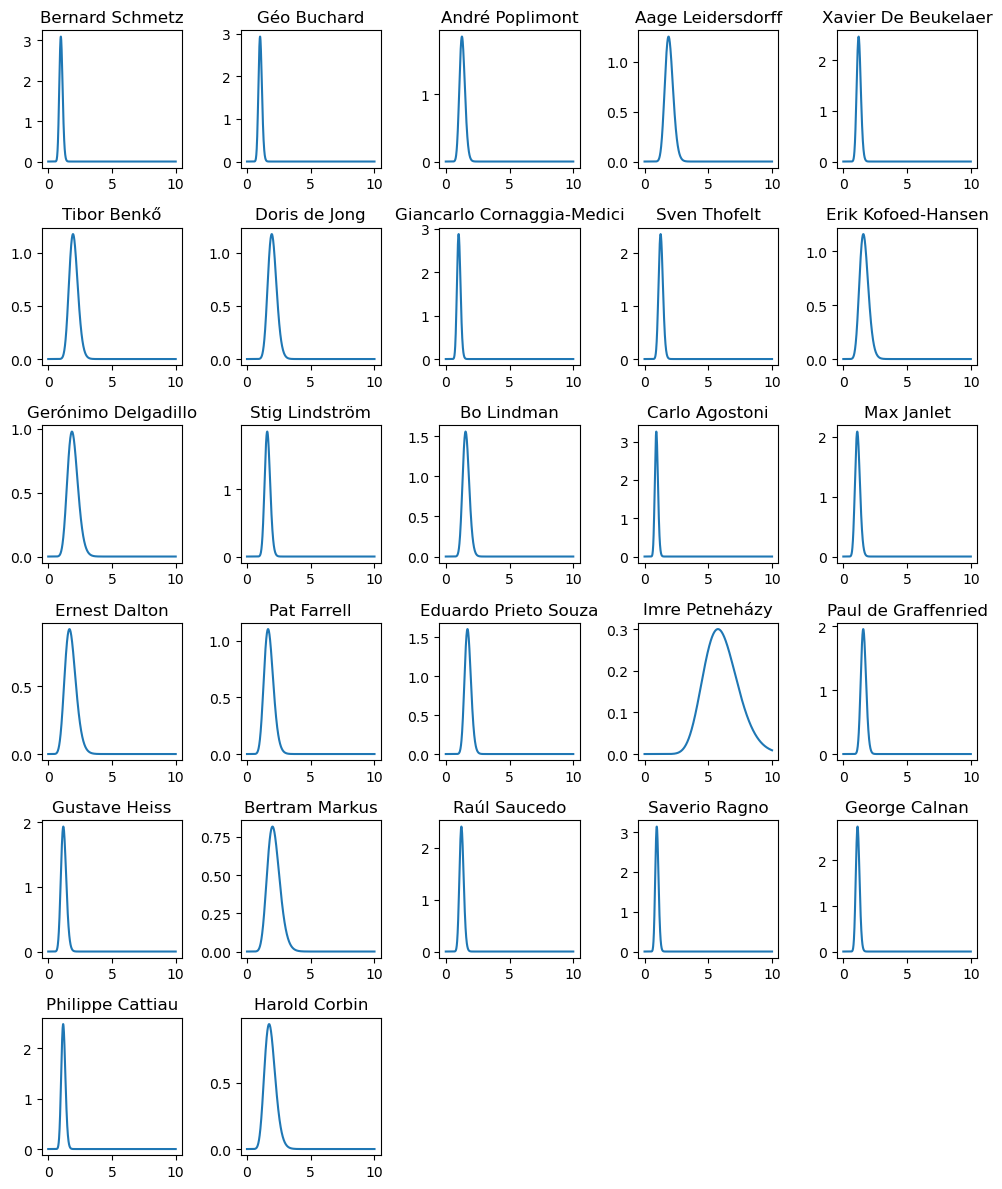

KeyError: 'Otto Schröder'

In [81]:
params = PAPERS(period_data, matchdata, True)

In [50]:
curr_matches

NameError: name 'curr_matches' is not defined

In [37]:
def prob_greater_than(a1, b1, a2, b2):
    samples_f = gamma.rvs(a1, scale=1/b1, size=10000)
    samples_g = gamma.rvs(a2, scale=1/b2, size=10000)
    return (samples_f > samples_g).mean()

def compute_I_values(a1, b1, a2, b2):
    prob_f_greater_g = prob_greater_than(a1, b1, a2, b2)
    prob_g_greater_f = 1 - prob_f_greater_g
    
    W1, R1 = 1, 0.5
    W2, R2 = 0.8, 0.2
    
    I1 = W1 * prob_f_greater_g + R1
    I2 = W2 * prob_g_greater_f + R2
    
    return I1, I2

def likelihood_given_I(params, I1, I2):
    a1, b1, a2, b2 = params
    likelihood_f = gamma.pdf(I1, a=a1, scale=1/b1)
    likelihood_g = gamma.pdf(I2, a=a2, scale=1/b2)
    
    return likelihood_f + likelihood_g

def compute_I_values(a1, b1, a2, b2):
    prob_f_greater_g = prob_greater_than(a1, b1, a2, b2)
    prob_g_greater_f = 1 - prob_f_greater_g
    
    W1, R1 = 1, 0.7
    W2, R2 = 0, 0.3
    
    I1 = (W1 * prob_f_greater_g + R1) / 2
    I2 = (W2 * prob_g_greater_f + R2) /2
    
    return I1, I2

# Objective function that computes the negative likelihood of I1 and I2 under f2 and g2
def objective(params):
    I1, I2 = compute_I_values(*params)
    a1, b1, a2, b2 = params
    likelihood_f = gamma.pdf(I1, a=a1, scale=1/b1)
    likelihood_g = gamma.pdf(I2, a=a2, scale=1/b2)
    
    return (likelihood_f * likelihood_g)

# Starting values (from prior)
params = [10, 2, 2, 2]

# Iterative optimization
tolerance = 1e-4
max_iterations = 1000
previous_obj = float('inf')
from scipy.optimize import minimize
for iteration in range(max_iterations):
    bounds = [(0.1, 10), (0.1, 10), (0.1, 10), (0.1, 10)]
    result = differential_evolution(objective, bounds)
    params = result.x
    
    if abs(previous_obj - result.fun) < tolerance:
        break
    previous_obj = result.fun

print(params)

[9.99917018 0.10017086 9.99972608 0.10004836]


In [4]:
params 

NameError: name 'params' is not defined